In [ ]:
! pip install natsort
! pip install numpy==1.26.4
! pip install pandas==2.2.3
! pip install elapid
! pip install odfpy

In [1]:
# importiamo le librerie necessarie
import warnings
from pprint import pprint
from glob import glob
import pandas as pd
import numpy as np
import elapid as ela
from elapid import MaxentModel, sample_bias_file
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.io import MemoryFile
from rasterio.mask import mask
import json
import natsort
import geopandas as gpd
import os

In [2]:
# Open the raster file
with rasterio.open(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\chelsa_bio\CHELSA_bio1_1981-2010_V.2.1_crop.tif")as src:
    crs = src.crs
    print("CRS:", crs)

CRS: EPSG:4326


In [3]:
# create a list of my raster path
raster_paths = natsort.natsorted(glob(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\chelsa_bio\*crop.tif"))
print(raster_paths)

['C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio1_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio2_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio3_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio4_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio5_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio6_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio7_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio8_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHE

In [4]:
# create data frame from inaturalis data
df_inaturalis = pd.read_csv(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\inaturalist_procambarus_clarkii_data.csv")

# we convert the lat/lon columns into a GeoSeries dataset, which is spatially aware
geometry = ela.xy_to_geoseries(
    x = df_inaturalis['longitude'],
    y = df_inaturalis['latitude']
)

# then merge the two together into a GeoDataFrame
procambarus = gpd.GeoDataFrame(df_inaturalis[["id", "observed_on", "scientific_name"]], geometry=geometry)

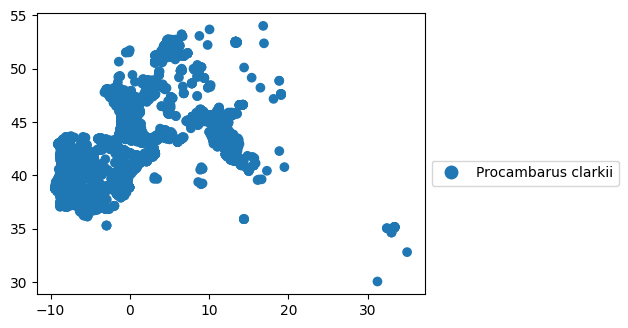

In [5]:
# plot the points geographically by species
fig, ax = plt.subplots(figsize=(5,5))
sp = procambarus.plot(
    column='scientific_name',
    ax=ax,
    legend=True,
    legend_kwds={"bbox_to_anchor": (1, 0.5)}
)

In [6]:
# Load the `background.txt` file (assuming tab-separated values)
df = pd.read_csv(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\background.txt", sep=" ", header=None, names=["longitude", "latitude"])

# Convert to GeoSeries using elapid
geometry = ela.xy_to_geoseries(x=df["longitude"], y=df["latitude"])

# Create GeoDataFrame
background = gpd.GeoDataFrame(geometry=geometry)

In [8]:
# Obtain covariates for presence and background points
presence = ela.annotate(
    procambarus.geometry,
    raster_paths,
    drop_na=True,
)

# we'll use the biased sample locations
background = ela.annotate(
    background,
    raster_paths,
    drop_na=True
)

# project the coordinates
projected_crs = "EPSG:3035"
background = background.to_crs(projected_crs)
presence = presence.to_crs(projected_crs)

Raster:   0%|                              | 0/19 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Raster:   0%|                              | 0/19 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

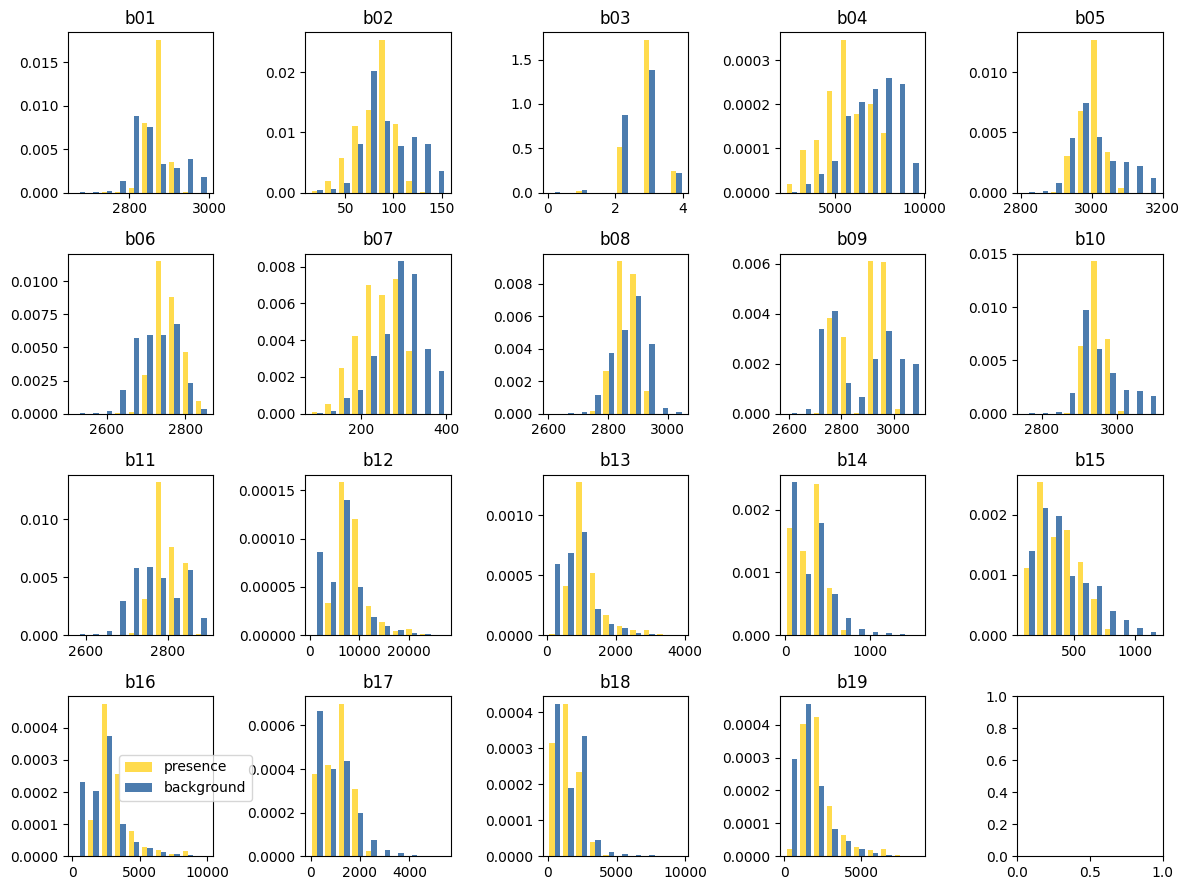

In [9]:
# Plotting differences between presence and background points
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(12,9))
labels= background.columns[1:].tolist()

for label, ax in zip(labels, axs.ravel()):
    pvar = presence[label]
    bvar = background[label]
    ax.hist(
        [pvar, bvar],
        density=True,
        alpha=0.7,
        label=['presence', 'background'],
        color= ['#FFCC02', '#00458C']

    )
    ax.set_title(label)

handles, lbls = ax.get_legend_handles_labels()
fig.legend(handles, lbls, loc=(0.1, 0.1))
plt.tight_layout()

<Axes: >

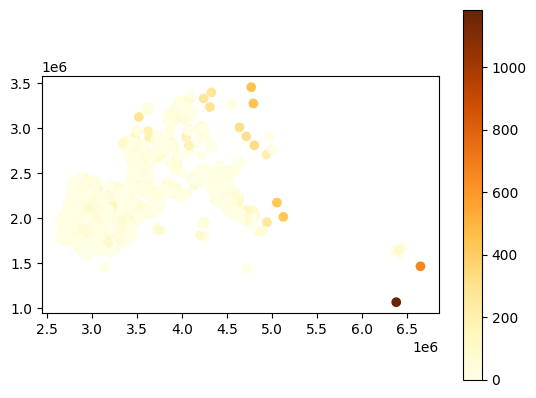

In [10]:
# Calculating sample weight
background['SampleWeight'] = ela.distance_weights(background, n_neighbors=1)
presence['SampleWeight'] = ela.distance_weights(presence, n_neighbors=1)

# Plotting geographic sample weight
presence.plot(column='SampleWeight', legend=True, cmap='YlOrBr')

In [11]:
# Stacking dataframe
merged = ela.stack_geodataframes(
    presence,
    background,
    add_class_label=True,
)
(merged.describe())

,b01,b02,b03,b04,b05,b06,b07,b08,b09,b10,...,b12,b13,b14,b15,b16,b17,b18,b19,SampleWeight,class
count,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,...,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000
mean,2867.543692,87.556334,2.802170,6348.777569,3007.116682,2742.051935,265.064748,2866.739728,2883.513453,2950.134279,...,7490.951397,1003.292560,288.062954,390.521654,2708.667806,1044.797813,1467.776715,2002.720509,4.395847,0.524900
std,42.343416,23.462399,0.601682,1502.826046,53.185343,45.597329,54.902001,44.216912,104.711930,45.018789,...,3799.189524,538.640997,209.837732,195.225629,1454.118747,683.665252,1048.721236,1270.478640,19.505749,0.499401
min,2660.000000,14.000000,0.000000,2207.000000,2805.000000,2514.000000,81.000000,2599.000000,2585.000000,2749.000000,...,147.000000,28.000000,1.000000,76.000000,64.000000,3.000000,3.000000,50.000000,0.000000,0.000000
25%,2836.000000,72.000000,2.000000,5296.000000,2967.000000,2716.000000,226.000000,2839.000000,2788.000000,2917.000000,...,5752.000000,738.500000,89.000000,245.000000,2021.500000,448.500000,527.500000,1232.000000,0.395474,0.000000
50%,2867.000000,87.000000,3.000000,6362.000000,3003.000000,2745.000000,273.000000,2869.000000,2924.000000,2947.000000,...,7264.000000,945.000000,312.000000,345.000000,2580.000000,1091.000000,1480.000000,1768.000000,1.000000,1.000000
75%,2889.000000,102.000000,3.000000,7531.000000,3031.000000,2775.000000,303.000000,2900.000000,2962.000000,2969.000000,...,9192.000000,1209.500000,432.000000,518.000000,3321.500000,1509.000000,2209.000000,2508.000000,2.052337,1.000000
max,2997.000000,154.000000,4.000000,9765.000000,3186.000000,2858.000000,398.000000,3050.000000,3102.000000,3107.000000,...,27381.000000,3951.000000,1586.000000,1190.000000,10068.000000,5464.000000,9820.000000,8841.000000,1184.008064,1.000000


In [12]:
# initialize and print the model defaults
maxent = ela.MaxentModel()
pprint(maxent.get_params())

{'beta_categorical': 1.0,
 'beta_hinge': 1.0,
 'beta_lqp': 1.0,
 'beta_multiplier': 1.5,
 'beta_threshold': 1.0,
 'clamp': True,
 'class_weights': 100,
 'convergence_tolerance': 2e-06,
 'feature_types': ['linear', 'hinge', 'product'],
 'n_cpus': 4,
 'n_hinge_features': 10,
 'n_lambdas': 100,
 'n_threshold_features': 10,
 'scorer': 'roc_auc',
 'tau': 0.5,
 'transform': 'cloglog',
 'use_lambdas': 'best',
 'use_sklearn': True}


In [38]:
# set up the x/y data for model fitting
x = merged.drop(columns=['class', 'SampleWeight'])
y = merged['class']
sample_weight = merged['SampleWeight']

# fit and evaluate the model under naive conditions
maxent.fit(x, y, sample_weight=sample_weight)
ypred = maxent.predict(x)

print(f"Unweighted naive AUC score: {metrics.roc_auc_score(y, ypred):0.3f}")
print(f"Weighted naive AUC score  : {metrics.roc_auc_score(y, ypred, sample_weight=sample_weight):0.3f}")

Unweighted naive AUC score: 0.946
Weighted naive AUC score  : 0.943


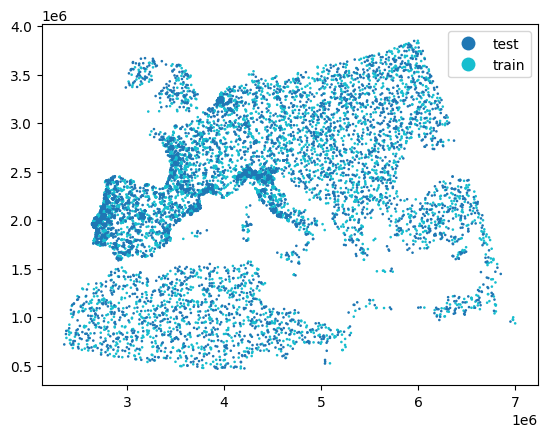

In [19]:
# checkbox train-test split
grid_size = 50_000  # meters
train, test = ela.checkerboard_split(merged, grid_size=grid_size)

# we'll re-merge them for plotting purposes
train['split'] = 'train'
test['split'] = 'test'
checker = ela.stack_geodataframes(train, test)
checker.plot(column='split', markersize=0.75, legend=True)

# convert train,test in EPSG:4326
train = train.to_crs("EPSG:4326")
test = test.to_crs("EPSG:4326")

In [20]:
# set up model fitting
xtrain = train.drop(columns=['class', 'SampleWeight', 'split'])
ytrain = train['class']
sample_weight_train = train['SampleWeight']

xtest = test.drop(columns=['class', 'SampleWeight', 'split'])
ytest = test['class']
sample_weight_test = test['SampleWeight']

maxent.fit(xtrain, ytrain, sample_weight=sample_weight_train)
ypred = maxent.predict(xtest)

print(f"Unweighted checkerboard AUC score: {metrics.roc_auc_score(ytest, ypred):0.3f}")
print(f"Weighted checkerboard AUC score: {metrics.roc_auc_score(ytest, ypred, sample_weight=sample_weight_test):0.3f}")

# save the fitted model to disk
ela.save_object(maxent, r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\procambarus_maxent.ela")

Unweighted checkerboard AUC score: 0.928
Weighted checkerboard AUC score: 0.841


In [21]:
# write the model predictions to disk
output_raster = r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\procambarus_maxent_predictions.tif"
ela.apply_model_to_rasters(maxent, raster_paths, output_raster, quiet=True)
# and read into memory
with rasterio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

In [22]:
# Open your land/sea mask raster
with rasterio.open(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\dem\dem_met_crop.tif") as mask_src:
    mask_data = mask_src.read(1)  # Read first band
    mask_nodata = mask_src.nodata
    mask_transform = mask_src.transform
    mask_crs = mask_src.crs

# Open the raster you want to mask
with rasterio.open(output_raster) as src:
    data = src.read(1)
    meta = src.meta.copy()

# Create the land mask: True where DEM is valid (not nodata), False where sea
land_mask = mask_data != mask_nodata

# Apply the mask: keep data only over land
masked_data = np.where(land_mask, data, src.nodata if src.nodata is not None else -9999)

# Update metadata
meta.update({
    "nodata": src.nodata if src.nodata is not None else -9999
})

# Save the output
with rasterio.open(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\procambarus_maxent_predictions.tif", "w", **meta) as dst:
    dst.write(masked_data, 1)



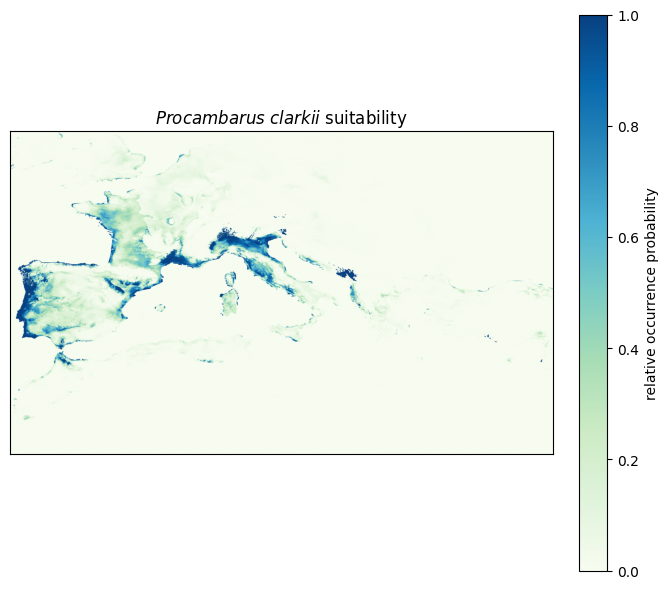

In [23]:
# Load the .tif file
with rasterio.open(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\procambarus_maxent_predictions.tif") as src:
    pred = src.read(1)  # Read the first band (assuming single-band raster)

# Plot the raster just like before
fig, ax = plt.subplots(1, 1, figsize=(7, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='GnBu')
ax.set_title('$Procambarus\\ clarkii$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.04)
plt.tight_layout()
plt.show()

In [24]:
# load italy_caves
df = pd.read_excel(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\national_cave_db\italy_caves.ods", engine="odf")

# we convert the lat/lon columns into a GeoSeries dataset, which is spatially aware
geometry = ela.xy_to_geoseries(
    x = df['longitude'],
    y = df['latitude']
)

# then merge the two together into a GeoDataFrame
italy_caves = gpd.GeoDataFrame(df[["code", "name", "regione", "depth_total", "elevation"]], geometry=geometry)
print(italy_caves.head())

     code                         name   regione depth_total  elevation  \
0   PI602        Abisso Eraldo Saracco  PIEMONTE         507     2126.0   
1   PI726     Abisso dei passi perduti  PIEMONTE         507     2075.0   
2   PI638              Cuore di pietra  PIEMONTE         680     2277.0   
3   PI694            Abisso Ferragosto  PIEMONTE         509     2171.0   
4  PI3358  Grotta  Ombelico del Margua  PIEMONTE         650     1878.0   

                   geometry  
0  POINT (7.67615 44.15943)  
1  POINT (7.67758 44.15781)  
2  POINT (7.68422 44.16343)  
3  POINT (7.68986 44.16147)  
4  POINT (7.69779 44.15287)  


In [26]:
# extract the distribution probability from cave location
prediction = (r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\procambarus_maxent_predictions.tif")
probability_italy = ela.annotate(
    italy_caves,
    prediction,
    drop_na=True
)

Raster:   0%|                              | 0/1 [00:00<?, ?it/s]

Sample:   0%|                              | 0/34435 [00:00<?, ?it/s]